In [3]:
from Ising import Ising

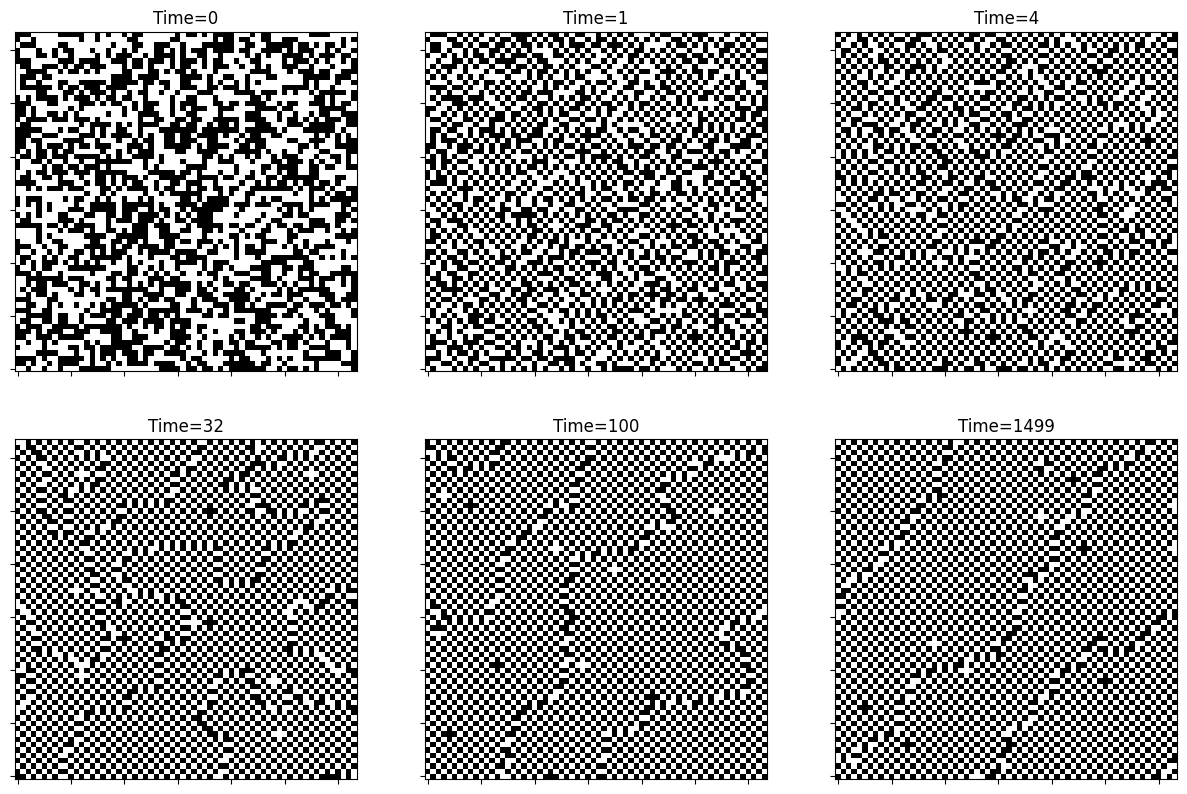

[-3754978.666666667, 608]

In [4]:
T = 1.3
lattice = 64
iterations = 1500
model = Ising(T, lattice, iterations, mesh="ortho", prop="antiferro", plots=True)
model.simulate()